In [136]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [137]:
foggy = "./dataset/foggy"
sunrise = "./dataset/sunrise"
shine = "./dataset/shine"
rainy = "./dataset/rainy"
cloudy = "./dataset/cloudy"

In [138]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 350
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 350


In [139]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [140]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|███████████████████████████████████████████████████████████████████████████████| 350/350 [00:00<00:00, 652.87it/s]


In [141]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1598, 150, 150, 3), (1598,))

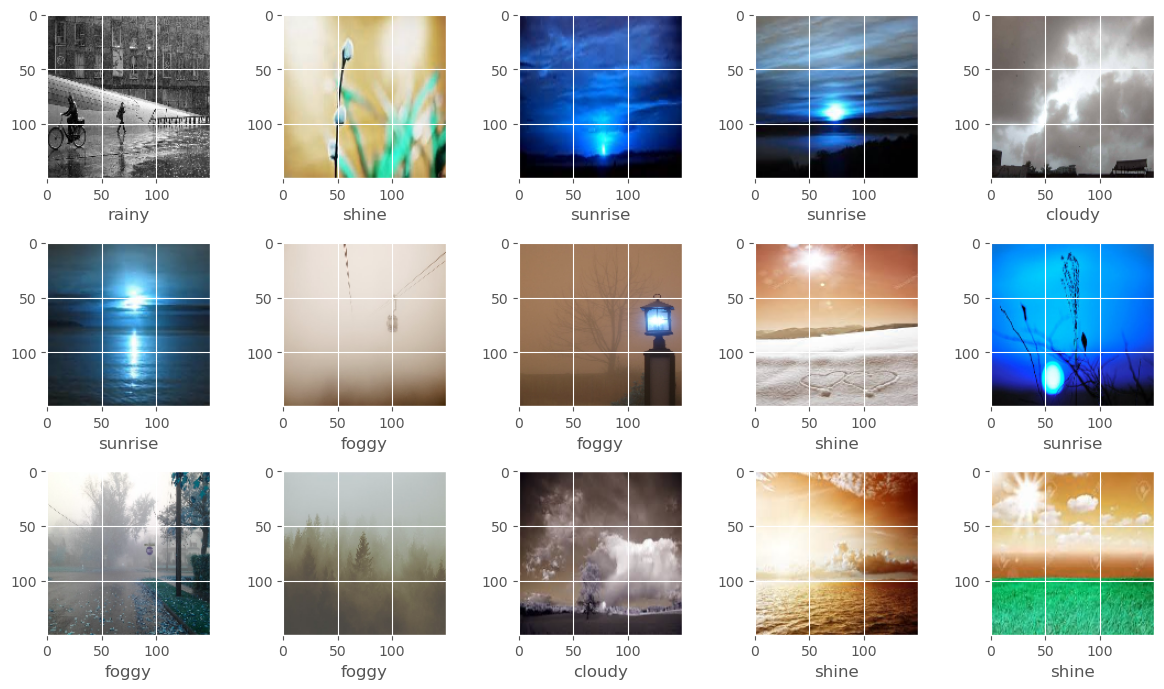

In [142]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [145]:
img_size = 150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [146]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [147]:
y_train_lb.shape,y_test_lb.shape

((1278, 5), (320, 5))

In [148]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(input_shape=(150, 150, 3), filters=64, kernel_size=(2, 2), activation="relu", padding="valid"))
model.add(Conv2D(64, kernel_size=(1, 1), activation="relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(2, 2), activation="relu", padding="valid"))
model.add(Conv2D(128, kernel_size=(1, 1), activation="relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (2, 2), activation='relu', padding='valid'))
model.add(Conv2D(256, (1, 1), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="softmax"))

In [149]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 149, 149, 64)      832       
                                                                 
 conv2d_25 (Conv2D)          (None, 149, 149, 64)      4160      
                                                                 
 batch_normalization_12 (Ba  (None, 149, 149, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 73, 73, 128)       32896     
                                                                 
 conv2d_27 (Conv2D)          (None, 73, 73, 128)      

In [150]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [155]:
batch_size=40
history =  model.fit(x_train,y_train_lb,epochs=20,validation_data=(x_test,y_test_lb),verbose=1,callbacks=earlystop)

Epoch 1/20
40/40 [==============================] - 26s 654ms/step - loss: 0.3406 - accuracy: 0.8959 - val_loss: 0.6829 - val_accuracy: 0.8000
Epoch 2/20
40/40 [==============================] - 26s 644ms/step - loss: 0.2961 - accuracy: 0.8983 - val_loss: 0.7946 - val_accuracy: 0.7937
Epoch 3/20
40/40 [==============================] - 26s 642ms/step - loss: 0.3025 - accuracy: 0.8967 - val_loss: 0.8022 - val_accuracy: 0.8094
Epoch 4/20
40/40 [==============================] - 26s 644ms/step - loss: 0.2600 - accuracy: 0.9116 - val_loss: 0.9460 - val_accuracy: 0.8156
Epoch 5/20
40/40 [==============================] - 25s 638ms/step - loss: 0.2395 - accuracy: 0.9124 - val_loss: 1.2248 - val_accuracy: 0.7594
Epoch 6/20
40/40 [==============================] - 28s 690ms/step - loss: 0.2767 - accuracy: 0.9108 - val_loss: 1.1328 - val_accuracy: 0.7750
Epoch 7/20
40/40 [==============================] - 25s 617ms/step - loss: 0.1942 - accuracy: 0.9280 - val_loss: 1.5351 - val_accuracy: 0.7531

In [156]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

10/10 [==============================] - 1s 131ms/step - loss: 0.9434 - accuracy: 0.8031
Loss: 0.9434100389480591
Accuracy: 0.8031250238418579


In [157]:
# Make predictions
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


10/10 [==============================] - 1s 125ms/step


In [158]:
import numpy as np
from sklearn.metrics import classification_report


# Make predictions
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))


10/10 [==============================] - 1s 121ms/step
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        72
           1       0.63      0.82      0.71        71
           2       0.89      0.74      0.81        57
           3       0.77      0.82      0.80        45
           4       0.93      0.95      0.94        75

    accuracy                           0.80       320
   macro avg       0.82      0.80      0.80       320
weighted avg       0.82      0.80      0.80       320



10/10 [==============================] - 1s 125ms/step
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        72
           1       0.63      0.82      0.71        71
           2       0.89      0.74      0.81        57
           3       0.77      0.82      0.80        45
           4       0.93      0.95      0.94        75

    accuracy                           0.80       320
   macro avg       0.82      0.80      0.80       320
weighted avg       0.82      0.80      0.80       320



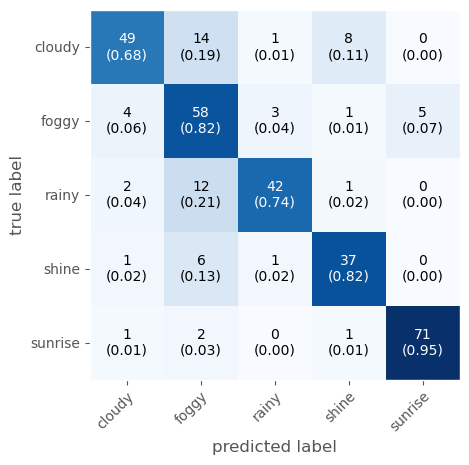

In [169]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have a trained model and x_test
# model = ... (your trained model)
# x_test = ... (your test data)
# y_test = ... (your true labels)

# Make predictions
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix

plot_confusion_matrix(conf_mat=cm, class_names=["cloudy", "foggy", "rainy", "shine", "sunrise"], show_normed=True)
plt.show()


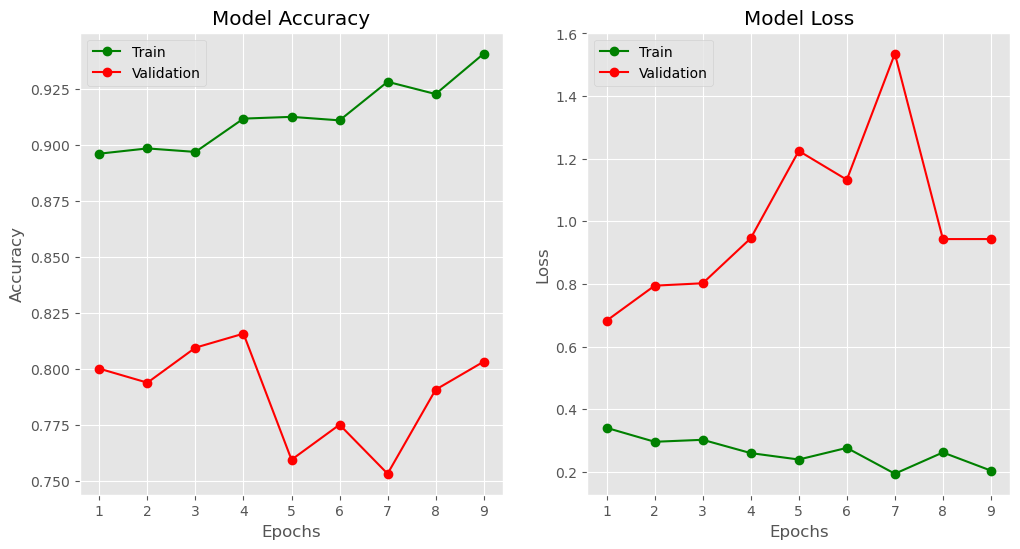

In [160]:
num_epochs = len(history.history['accuracy'])
epochs = range(1, num_epochs + 1)

plt.style.use("ggplot")
fig = plt.figure(figsize=(12, 6))

# Plotting Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], "go-", label="Train")
plt.plot(epochs, history.history["val_accuracy"], "ro-", label="Validation")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

# Plotting Model Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history["loss"], "go-", label="Train")
plt.plot(epochs, history.history["val_loss"], "ro-", label="Validation")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper left")

plt.show()

In [161]:
model.save("./model")

# from tensorflow.keras.models import load_model
# model = load_model('./model')

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets


### Testing :

In [162]:
test = "./dataset/alien_test"
test_x = []
test_y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        test_x.append(img)
        test_y.append(i.split('_')[0])
    return test_x, test_y


test_x, test_y = create_dataset(test, "test")

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 200.79it/s]


In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
actual_y = test_y
test_y = le.fit_transform(test_y)

img_size = 150
test_x = np.array(test_x)/255.0
test_y = np.array(test_y)

In [164]:
pred_y = np.argmax(model.predict(test_x), axis=-1)

1/1 [==============================] - 0s 198ms/step


In [172]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.86      0.60      0.71        10
           2       0.86      1.00      0.92         6
           3       0.60      1.00      0.75         3
           4       0.88      1.00      0.93         7

    accuracy                           0.77        30
   macro avg       0.70      0.77      0.72        30
weighted avg       0.77      0.77      0.75        30



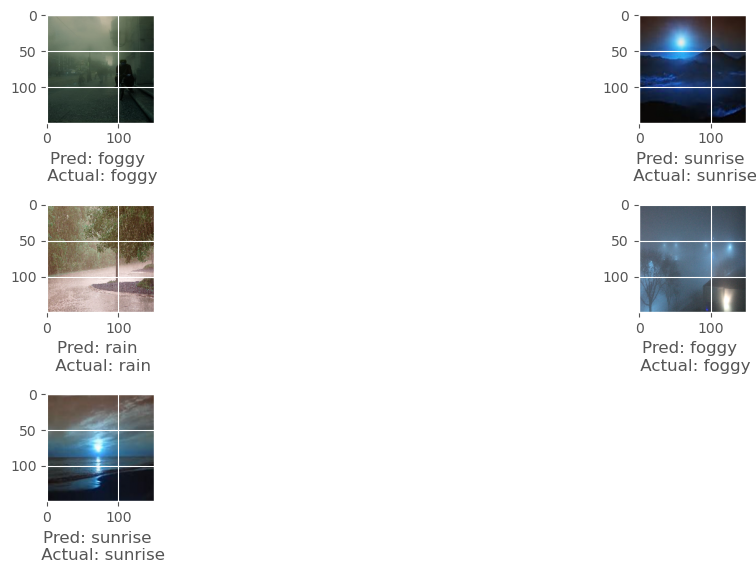

In [180]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(5):
    sample = random.choice(range(len(test_x)))
    plt.subplot(5, 2, i + 1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(test_x[sample])
    if pred_y[sample] == 0:
        label = 'cloud'
    elif pred_y[sample] == 1:
        label = 'foggy'
    elif pred_y[sample] == 2:
        label = 'rain'
    elif pred_y[sample] == 3: 
        label = 'shine'
    elif pred_y[sample] == 4:
        label = 'sunrise'
    plt.xlabel(f"Pred: {label} \n Actual: {actual_y[sample]}")
    
plt.tight_layout()    
plt.show() 